In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
#load the dataset
data = pd.read_csv(r"C:\Users\siyam\Downloads\creditcard.csv")

In [3]:
#first five row
data.head()


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
#last five row
data.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

Exploratory Data Analysis

In [5]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Data Cleaning

In [6]:
# checking no. of missing value in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# distribution of legit transaction & fraudulent transaction
data['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# Distribution of the target variable
class_distribution = data['Class'].value_counts(normalize=True)

In [11]:
# Summary statistics of numerical features
summary_stats = data.describe()

In [12]:
# Correlation matrix for a quick overview of feature relationships
correlation_matrix = data.corr()

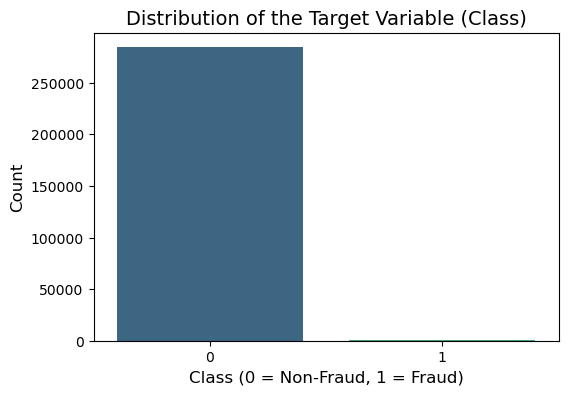

In [14]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class', palette='viridis')
plt.title('Distribution of the Target Variable (Class)', fontsize=14)
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()



In [13]:
class_distribution, summary_stats, correlation_matrix.iloc[:5, :5]  # Show a slice of correlation matrix for brevity

(Class
 0    0.998273
 1    0.001727
 Name: proportion, dtype: float64,
                 Time            V1            V2            V3            V4  \
 count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
 mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
 std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
 min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
 25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
 50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
 75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
 max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   
 
                  V5            V6            V7            V8            V9  \
 count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
 mean   9.604066e-16  1.487313e-15 -5

In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
data.replace([np.inf, -np.inf], np.nan, inplace=True)

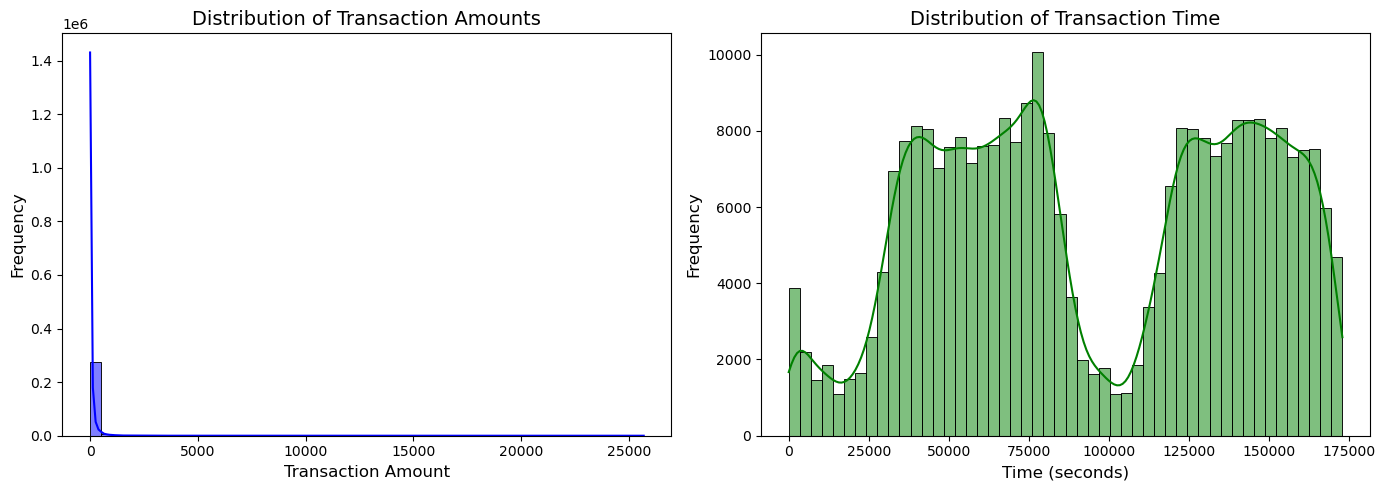

In [20]:
# Visualize the distribution of `Amount` and `Time`
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Plot for `Amount`
sns.histplot(data['Amount'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Transaction Amounts', fontsize=14)
axes[0].set_xlabel('Transaction Amount', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
# Plot for `Time`
sns.histplot(data['Time'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Transaction Time', fontsize=14)
axes[1].set_xlabel('Time (seconds)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()




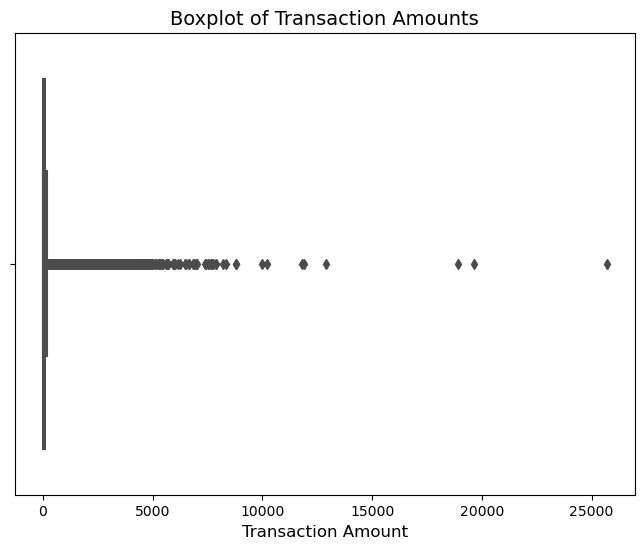

In [18]:
# Check for outliers in `Amount` using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Amount', color='orange')
plt.title('Boxplot of Transaction Amounts', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.show()

Features Engineering

In [11]:
# separating the data for analysis
legit = data[data.Class==0]
fraud = data[data.Class==1]

In [12]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
#statistical measure of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
#compare the value for both transactions
data.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30 columns]

Model Training

In [19]:
# Build a sample dataset containing similar distribution of normal transaction and fraudlent transaction

In [20]:
legit_sample = legit.sample(n=492)


In [21]:
## Concatenating two DataFrame

In [22]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [23]:
new_dataset.head()

Time        V1        V2        V3        V4        V5        V6  \
102116   68058.0 -1.453398  1.265073  0.844495 -1.844455 -0.471795 -1.158305   
121391   76175.0 -1.101233  1.210060  1.664072  1.971205  0.330760  1.748717   
140253   83620.0  1.370769 -1.387559  1.131060 -1.372039 -1.973458 -0.144110   
266465  162341.0  2.085175  0.393051 -4.508201 -0.311771  3.510117  2.453299   
83074    59675.0  1.276033  0.250075 -0.171008  0.310048  0.257951 -0.072828   

              V7        V8        V9  ...       V21       V22       V23  \
102116  0.189130  0.708750 -0.603879  ...  0.135288  0.033218  0.044869   
121391 -0.034820  1.054306 -0.965038  ... -0.016959 -0.017626  0.188460   
140253 -1.568713 -0.039526 -1.402161  ...  0.096189  0.630639 -0.135952   
266465  0.220469  0.543377 -0.100434  ... -0.067217 -0.072642 -0.036584   
83074  -0.018146  0.007526 -0.169455  ... -0.304919 -0.926531 -0.038153   

             V24       V25       V26       V27       V28  Amount  Class  
102116  0.474557 -0.366370  0.954010 -0.400215 -0.033962    8.00      0  
121391 -0.684615 -0.441416 -0.120756 -0.120089 -0.016860   20.42      0  
140253 -0.074488  0.291462 -0.021320  0.079478  0.047307   78.03      0  
266465  0.529693  0.414685  0.735870 -0.058233 -0.026658    0.76      0  
83074  -0.873647  0.342847  0.147833 -0.029438  0.010875   11.99      0  

[5 rows x 31 columns]

In [25]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [26]:
new_dataset.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      96091.264228  0.024989  0.018220 -0.004218 -0.072355  0.013424   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.054225  0.051674  0.029531  0.067564  ... -0.013842  0.034998   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.024703  0.042360 -0.008039 -0.030306  0.018093 -0.004873 -0.010974   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.406463  
1      122.211321  

[2 rows x 30 columns]

Model Training

In [27]:
#splitting the data into Features & targets
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset['Class']

In [28]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
102116   68058.0 -1.453398  1.265073  0.844495 -1.844455 -0.471795 -1.158305   
121391   76175.0 -1.101233  1.210060  1.664072  1.971205  0.330760  1.748717   
140253   83620.0  1.370769 -1.387559  1.131060 -1.372039 -1.973458 -0.144110   
266465  162341.0  2.085175  0.393051 -4.508201 -0.311771  3.510117  2.453299   
83074    59675.0  1.276033  0.250075 -0.171008  0.310048  0.257951 -0.072828   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [29]:
print(Y)

102116    0
121391    0
140253    0
266465    0
83074     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [31]:
# split the data into Training data and Testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y, random_state = 2)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [34]:
model = LogisticRegression()

In [35]:
# training the logistic Regression Model with Training Data
model.fit(X_train,Y_train)

LogisticRegression()

In [36]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)


In [37]:
print('Accuracy on Training data :',training_data_accuracy)

Accuracy on Training data : 0.9212198221092758


In [38]:
# accuracy on test data 
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [39]:
print('Accuracy on Test data :',test_data_accuracy)

Accuracy on Test data : 0.9035532994923858
